In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_x,train_y),(test_x,test_y)=cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


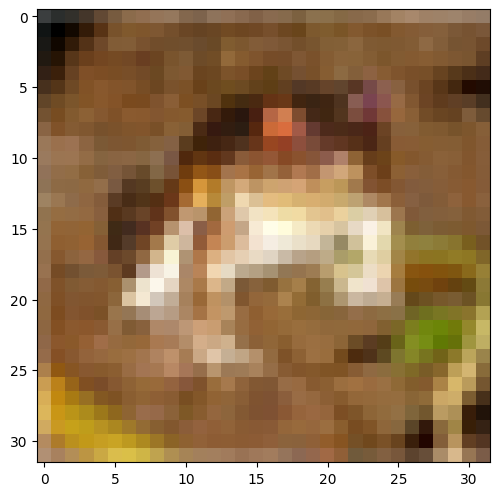

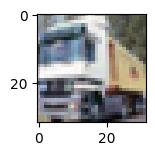

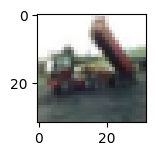

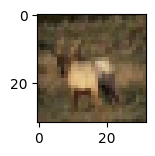

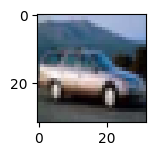

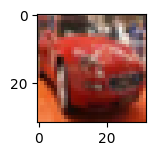

In [ ]:
n=6
plt.figure(figsize=(20,20))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_x[i])
  plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [ ]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=b117035137f09fa4f34f18a81516e35f419b2472093416e78fc0c221b97fd6f8
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56438 sha256=d236a27446f6022dbaadbc9bbe3b873b82c640e52d2da4034b1fdb32743c8773
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import np_utils
#from keras.utils import np_utils

In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical

In [ ]:
train_X=train_x.astype('float32')
test_X=test_x.astype('float32')

train_x=train_x/255.0
test_x=test_x/255.0

In [ ]:
train_y= tensorflow.keras.utils.to_categorical(train_y)
test_y=tensorflow.keras.utils.to_categorical(test_y)

num_classes=test_y.shape[1]

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=max_norm(3)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [ ]:
sgd=SGD(learning_rate=0.01,momentum=0.9,nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5

In [ ]:
model.fit(train_x,train_y,validation_data=(test_x,test_y),epochs=5,batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 673s 430ms/step - loss: 0.6854 - accuracy: 0.7584 - val_loss: 1.1621 - val_accuracy: 0.6299
Epoch 2/5
1563/1563 [==============================] - 680s 435ms/step - loss: 0.5856 - accuracy: 0.7944 - val_loss: 1.1379 - val_accuracy: 0.6331
Epoch 3/5
1563/1563 [==============================] - 682s 436ms/step - loss: 0.5031 - accuracy: 0.8256 - val_loss: 1.2214 - val_accuracy: 0.6350
Epoch 4/5
1563/1563 [==============================] - 684s 437ms/step - loss: 0.4403 - accuracy: 0.8471 - val_loss: 1.2642 - val_accuracy: 0.6321
Epoch 5/5
1563/1563 [==============================] - 682s 436ms/step - loss: 0.3885 - accuracy: 0.8664 - val_loss: 1.3557 - val_accuracy: 0.6326


In [ ]:
_,acc=model.evaluate(test_x,test_y)
print(acc*100)

313/313 [==============================] - 18s 57ms/step - loss: 1.3557 - accuracy: 0.6326
63.26000094413757


In [ ]:
model.save('modell_cifar_10epochs.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
model=load_model('/content/modell_cifar_10epochs.h5')

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image1=image.load_img('download1.jpeg',target_size=(32,32))


In [ ]:
test_image=image.img_to_array(test_image1)
test_image=np.expand_dims(test_image,axis=0)
results=model.predict(test_image)
print(results)
if results[0][0]==1:
  print('Aeroplane')
elif results[0][1]==1:
  print('Automobile')
elif results[0][2]==1:
  print('Bird')
elif results[0][3]==1:
  print('Cat')
elif results[0][4]==1:
  print('Deer')
elif results[0][5]==1:
  print('Dog')
elif results[0][6]==1:
  print('Frog')
elif results[0][7]==1:
  print('Horse')
elif results[0][8]==1:
  print('Ship')
elif results[0][9]==1:
  print('Truck')
else:
  print('Error')




1/1 [==============================] - 0s 31ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Automobile


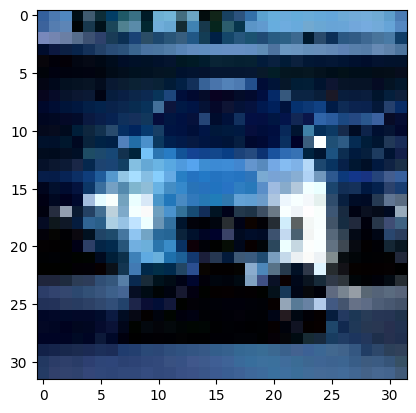

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(test_image1)